In [1]:
!python3 -m pip install scikit-fuzzy

In [2]:
import skfuzzy as fuzz
import skfuzzy.control as sys
import numpy as np

toleranciaErro = 5
emax, emin = 160, -160
e = np.arange(emin, emax, 0.1)

toleranciaDeltaErro = 2
demax, demin = 10, -10
de = np.arange(demin, demax, 0.1)

erro = sys.Antecedent(e, 'erro')
deltaErro = sys.Antecedent(de, 'deltaErro')
potencia = sys.Consequent(np.arange(0, 100, 0.1), 'aceleracao')

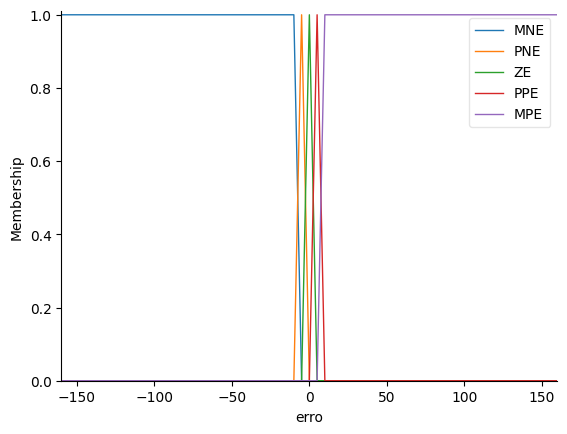

In [3]:
# Funções de pertinência do erro

erro['MNE'] = fuzz.trapmf(erro.universe, [emin, emin, -2 * toleranciaErro, -toleranciaErro])
erro['PNE'] = fuzz.trimf(erro.universe, [-2*toleranciaErro, -toleranciaErro, 0])
erro['ZE'] = fuzz.trimf(erro.universe, [-toleranciaErro, 0, toleranciaErro])
erro['PPE'] = fuzz.trimf(erro.universe, [0, toleranciaErro, 2 * toleranciaErro])
erro['MPE'] = fuzz.trapmf(erro.universe, [toleranciaErro, 2 * toleranciaErro, emax, emax])

erro.view()

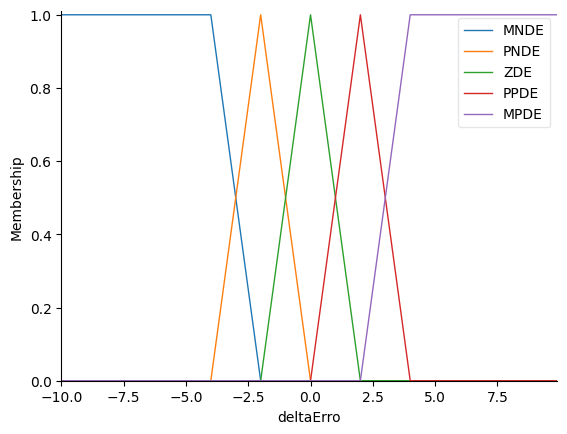

In [4]:
# Funções de pertinência do erro

deltaErro['MNDE'] = fuzz.trapmf(deltaErro.universe, [demin, demin, -2 * toleranciaDeltaErro, -toleranciaDeltaErro])
deltaErro['PNDE'] = fuzz.trimf(deltaErro.universe, [-2*toleranciaDeltaErro, -toleranciaDeltaErro, 0])
deltaErro['ZDE'] = fuzz.trimf(deltaErro.universe, [-toleranciaDeltaErro, 0, toleranciaDeltaErro])
deltaErro['PPDE'] = fuzz.trimf(deltaErro.universe, [0, toleranciaDeltaErro, 2 * toleranciaDeltaErro])
deltaErro['MPDE'] = fuzz.trapmf(deltaErro.universe, [toleranciaDeltaErro, 2 * toleranciaDeltaErro, demax, demax])

deltaErro.view()

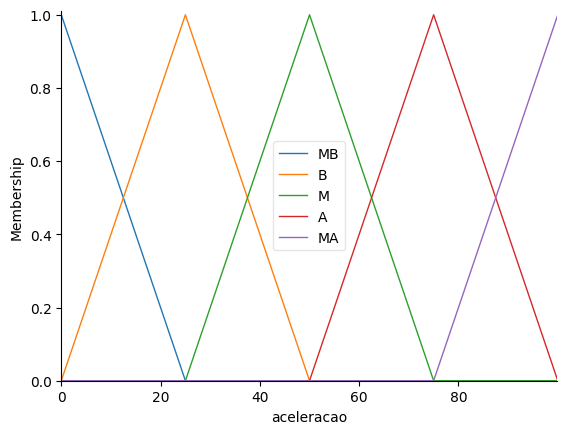

In [5]:
# Funções de pertinência dos conjuntos da saída

potencia['MB'] = fuzz.trimf(potencia.universe, [0, 0, 25])
potencia['B'] = fuzz.trimf(potencia.universe, [0, 25, 50])
potencia['M'] = fuzz.trimf(potencia.universe, [25, 50, 75])
potencia['A'] = fuzz.trimf(potencia.universe, [50, 75, 100])
potencia['MA'] = fuzz.trimf(potencia.universe, [75, 100, 100])

potencia.view()

In [6]:
# Base de regras

baseRegras = []
sintonia = ['MA', 'A', 'A', 'M', 'B',
            'MA', 'M', 'M', 'M', 'B',
            'MA', 'A', 'M', 'B', 'MB',
            'MA', 'A', 'B', 'B', 'MB',
            'A', 'M', 'B', 'B', 'MB',]

counter = 0

for deltaErrors in deltaErro.terms:
  for errors in erro.terms:
    baseRegras.append(sys.Rule(deltaErro[deltaErrors] & erro[errors], potencia[sintonia[counter]]))
    counter += 1

In [11]:
regras = sys.ControlSystem(baseRegras)
controlador = sys.ControlSystemSimulation(regras)

er = [-30, 2, -7.5]
der = [-1.2, 1.4, -3.5]

for c in range(len(er)):
  controlador.input['erro'] = er[c]
  controlador.input['deltaErro'] = der[c]
  controlador.compute()

  p = controlador.output['aceleracao']
  print(p)

90.6612068965515
33.881578947368375
69.62198568361111
